## Prediksi Employee Attrition 

## Intro
Sooltan Corp adalah perusahaan pengembangan perangkat lunak profesional yang membangun situs web dan aplikasi seluler yang berbasis di Jakarta, Indonesia sejak tahun 2017. 
Sooltan Corp memiliki visi untuk memberdayakan klien Startup, Small Medium Business, dan Enterprise, dengan memberikan solusi di berbagai platform seperti infrastruktur PHP, Android, iOS, Magento, dan Cloud

### Problem
Attrition rate di Sooltan Corp mencapai 16%, sedangkan attririon rate di perusahaan sejenis hanya mencapai 10,9%.

### Objective
Mengetahui faktor-faktor yang paling berpengaruh terhadap attrition rate di perusahaan ini.
Memberikan rekomendasi tentang apa saja yang dapat dilakukan oleh pihak perusahaan untuk mengurangi attrition rate tersebut.

## 1. Prepare the data

### a. Loading libraries

In [1]:
import math
import numpy as np
import pandas as pd

import scipy.stats as stats

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, cross_val_predict, KFold
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, classification_report, average_precision_score,
                            PrecisionRecallDisplay)                 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### b. Loding the dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Melihat nilai unik pada kolom dengan tipe data kategorical 

In [4]:
print(df.Department.unique())
print(df.BusinessTravel.unique())
print(df.EducationField.unique())
print(df.Gender.unique())
print(df.JobRole.unique())
print(df.MaritalStatus.unique())
print(df.Attrition.unique())

['Sales' 'Research & Development' 'Human Resources']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Yes' 'No']


## 2. Summerize data

### a. Data visualization

Copy dataframe kedalam dataframe baru untuk visualisasi

In [5]:
dataframe = df.copy()

**Segmentasi kolom dengan nilai unik yang cukup banyak, untuk melihat pola atrisi yang lebih jelas**

In [6]:
#mensegmentasikan employee berdasar usia, diketahui rentang usia: 18-60 th, shg pengelompokkan dilakukan dg rentang usia dlm 1 kelompok ~ 10 th 
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(dataframe); 

In [7]:
import numpy as np
#mensegmentasikan kelompok jarak rumah 
def DistanceFromHome(dataframe):
    dataframe.loc[dataframe['DistanceFromHome'] <= 5,'DistanceFromHome'] = 1
    dataframe.loc[(dataframe['DistanceFromHome'] > 5) & (dataframe['DistanceFromHome'] <= 10), 'DistanceFromHome'] = 2
    dataframe.loc[(dataframe['DistanceFromHome'] > 10) & (dataframe['DistanceFromHome'] <= 15), 'DistanceFromHome'] = 3
    dataframe.loc[(dataframe['DistanceFromHome'] > 15) & (dataframe['DistanceFromHome'] <= 20), 'DistanceFromHome'] = 4
    dataframe.loc[(dataframe['DistanceFromHome'] > 20) & (dataframe['DistanceFromHome'] <= 25), 'DistanceFromHome'] = 5
    dataframe.loc[(dataframe['DistanceFromHome'] > 25) & (dataframe['DistanceFromHome'] <= 30), 'DistanceFromHome'] = 6
    return dataframe

DistanceFromHome(dataframe); 

In [8]:
# mensegmentasikan monthly salary (10.000-200.000$)
def MonthlyIncome(dataframe):
    dataframe.loc[dataframe['MonthlyIncome'] <= 50000,'MonthlyIncome'] = 1
    dataframe.loc[(dataframe['MonthlyIncome'] > 50000) & (dataframe['MonthlyIncome'] <= 100000), 'MonthlyIncome'] = 2
    dataframe.loc[(dataframe['MonthlyIncome'] > 100000) & (dataframe['MonthlyIncome'] <= 150000), 'MonthlyIncome'] = 3
    dataframe.loc[dataframe['MonthlyIncome'] > 150000, 'MonthlyIncome'] = 4
    return dataframe

MonthlyIncome(dataframe); 

In [9]:
# mensegmentasikan total working years (1-40 tahun)
def TotalWorkingYears(dataframe):
    dataframe.loc[dataframe['TotalWorkingYears'] <= 10,'TotalWorkingYears'] = 1
    dataframe.loc[(dataframe['TotalWorkingYears'] > 10) & (dataframe['TotalWorkingYears'] <= 20), 'TotalWorkingYears'] = 2
    dataframe.loc[(dataframe['TotalWorkingYears'] > 20) & (dataframe['TotalWorkingYears'] <= 30), 'TotalWorkingYears'] = 3
    dataframe.loc[dataframe['TotalWorkingYears'] > 30, 'TotalWorkingYears'] = 4
    return dataframe

TotalWorkingYears(dataframe); 

In [10]:
# mensegmentasikan Years at Company (1-40 tahun)
def YearsAtCompany(dataframe):
    dataframe.loc[dataframe['YearsAtCompany'] <= 10,'YearsAtCompany'] = 1
    dataframe.loc[(dataframe['YearsAtCompany'] > 10) & (dataframe['YearsAtCompany'] <= 20), 'YearsAtCompany'] = 2
    dataframe.loc[(dataframe['YearsAtCompany'] > 20) & (dataframe['YearsAtCompany'] <= 30), 'YearsAtCompany'] = 3
    dataframe.loc[dataframe['YearsAtCompany'] > 30, 'YearsAtCompany'] = 4
    return dataframe

YearsAtCompany(dataframe); 

In [11]:
# mensegmentasikan Years with Current Manager (1-17 tahun)
def YearsWithCurrManager(dataframe):
    dataframe.loc[dataframe['YearsWithCurrManager'] <= 5,'YearsWithCurrManager'] = 1
    dataframe.loc[(dataframe['YearsWithCurrManager'] > 5) & (dataframe['YearsWithCurrManager'] <= 10), 'YearsWithCurrManager'] = 2
    dataframe.loc[(dataframe['YearsWithCurrManager'] > 10) & (dataframe['YearsWithCurrManager'] <= 15), 'YearsWithCurrManager'] = 3
    dataframe.loc[dataframe['YearsWithCurrManager'] > 15, 'YearsWithCurrManager'] = 4
    return dataframe

YearsWithCurrManager(dataframe); 

In [12]:
#mensegmentasikan Dailyrate 
def DailyRate(dataframe):
    dataframe.loc[dataframe['DailyRate'] <= 300,'DailyRate'] = 1
    dataframe.loc[(dataframe['DailyRate'] > 300) & (dataframe['DailyRate'] <= 600), 'DailyRate'] = 2
    dataframe.loc[(dataframe['DailyRate'] > 600) & (dataframe['DailyRate'] <= 900), 'DailyRate'] = 3
    dataframe.loc[(dataframe['DailyRate'] > 900) & (dataframe['DailyRate'] <= 1200), 'DailyRate'] = 4
    dataframe.loc[dataframe['DailyRate'] > 1200, 'DailyRate'] = 5
    return dataframe

DailyRate(dataframe); 

In [13]:
#mensegmentasikan HourlyRate 
def HourlyRate(dataframe):
    dataframe.loc[dataframe['HourlyRate'] <= 50,'HourlyRate'] = 1
    dataframe.loc[(dataframe['HourlyRate'] > 50) & (dataframe['HourlyRate'] <= 75), 'HourlyRate'] = 2
    dataframe.loc[dataframe['HourlyRate'] > 75, 'HourlyRate'] = 3
    return dataframe

HourlyRate(dataframe); 

In [14]:
#mensegmentasikan MonthlyRate 
def MonthlyRate(dataframe):
    dataframe.loc[dataframe['MonthlyRate'] <= 7000,'MonthlyRate'] = 1
    dataframe.loc[(dataframe['MonthlyRate'] > 7000) & (dataframe['MonthlyRate'] <= 12000), 'MonthlyRate'] = 2
    dataframe.loc[(dataframe['MonthlyRate'] > 12000) & (dataframe['MonthlyRate'] <= 17000), 'MonthlyRate'] = 3
    dataframe.loc[(dataframe['MonthlyRate'] > 17000) & (dataframe['MonthlyRate'] <= 22000), 'MonthlyRate'] = 4
    dataframe.loc[dataframe['MonthlyRate'] > 22000, 'MonthlyRate'] = 5
    return dataframe

MonthlyRate(dataframe); 

In [15]:
#mensegmentasikan YearsInCurrentRole 
def YearsInCurrentRole(dataframe):
    dataframe.loc[dataframe['YearsInCurrentRole'] <= 7000,'YearsInCurrentRole'] = 1
    dataframe.loc[(dataframe['YearsInCurrentRole'] > 7000) & (dataframe['YearsInCurrentRole'] <= 12000), 'YearsInCurrentRole'] = 2
    dataframe.loc[(dataframe['YearsInCurrentRole'] > 12000) & (dataframe['YearsInCurrentRole'] <= 17000), 'YearsInCurrentRole'] = 3
    dataframe.loc[(dataframe['YearsInCurrentRole'] > 17000) & (dataframe['YearsInCurrentRole'] <= 22000), 'YearsInCurrentRole'] = 4
    dataframe.loc[dataframe['YearsInCurrentRole'] > 22000, 'YearsInCurrentRole'] = 5
    return dataframe

YearsInCurrentRole(dataframe); 

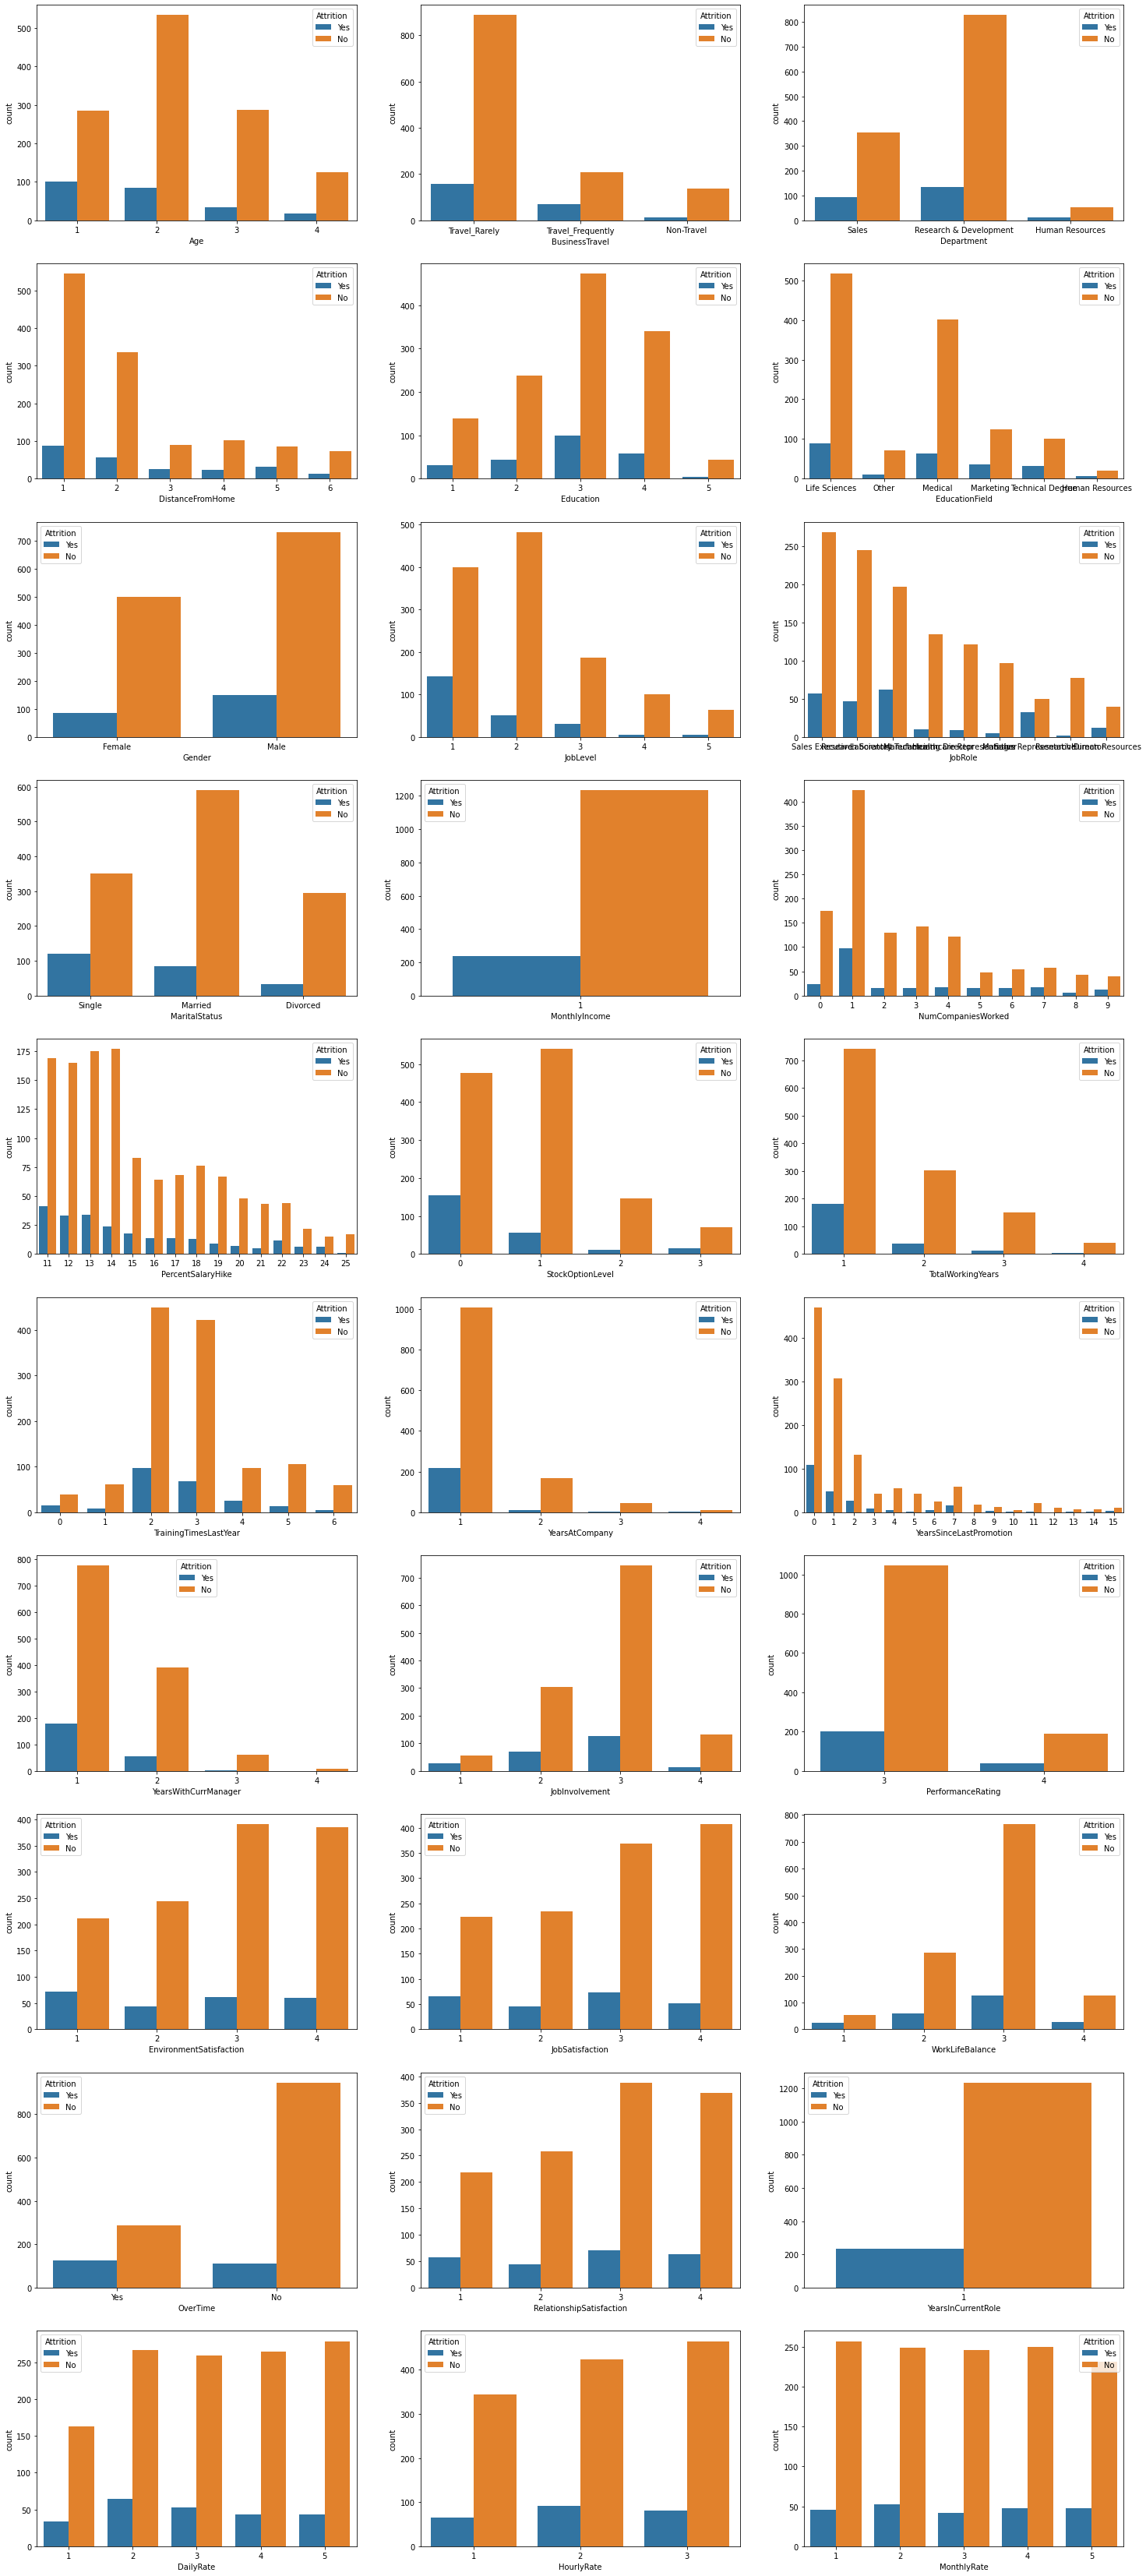

In [16]:
plt.figure(figsize = (25,60))
x = (["","Age", "BusinessTravel", "Department", "DistanceFromHome", 
      "Education", "EducationField", "Gender", "JobLevel", "JobRole", "MaritalStatus", "MonthlyIncome",
      "NumCompaniesWorked", "PercentSalaryHike", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
      "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager", "JobInvolvement", "PerformanceRating", 
      "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance","OverTime","RelationshipSatisfaction",
      "YearsInCurrentRole","DailyRate","HourlyRate","MonthlyRate"])
for i in range(1,31):
    plt.subplot(10,3,i)
    sns.countplot(x = x[i], data=dataframe, hue="Attrition") #hue : names of variables in data or vector data
    
plt.show()

**Kami memvisualisasikan lebih dalam atrisi pada beberapa kolom seperti jenis kelamin, usia, departemen, dan role pekerjaan**

**Visualisasi tingkat atrisi karyawan berdasarkan jenis kelamin**

In [17]:
dfs = dataframe.groupby(['Attrition', 'Gender']).size().reset_index()
df_plot_Gen = dataframe.groupby(['Attrition', 'Gender']).size().reset_index().pivot(columns = 'Attrition', index = 'Gender', values = 0)
df_plot_Gen

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


In [18]:
df_plot_Gen['Total Employee'] = df_plot_Gen['No'] + df_plot_Gen['Yes']
df_plot_Gen['Attrition No'] = df_plot_Gen['No']/df_plot_Gen['Total Employee']*100.00
df_plot_Gen['Attrition Yes'] = df_plot_Gen['Yes']/df_plot_Gen['Total Employee']*100.00
df_plot_Gen = df_plot_Gen.drop(['No','Yes','Total Employee'], axis=1)
df_plot_Gen

Attrition,Attrition No,Attrition Yes
Gender,,
Female,85.204082,14.795918
Male,82.993197,17.006803


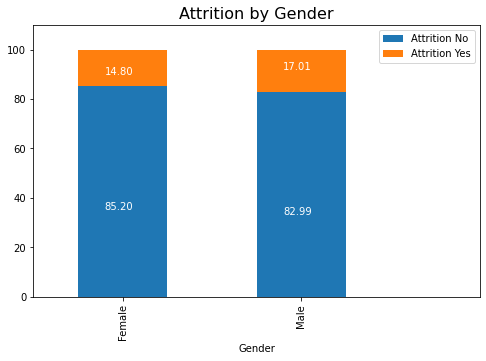

In [61]:
df_plot_Gen.plot(kind='bar',stacked=True, figsize=(8,5))
plt.title('Attrition by Gender', fontsize = 16)
plt.legend(loc = 'upper right')
plt.xlim(-0.5,2)
plt.ylim(0, 110);

for i, v in enumerate(df_plot_Gen['Attrition No']):
    plt.text(i-.1, v-50, '{:,.2f}'.format(v), color='white')
    
for i, v in enumerate(df_plot_Gen['Attrition Yes']):
    plt.text(i-.1, v+75, '{:,.2f}'.format(v), color='white');

* Laki-laki mempunyai tingkat atrisi yang lebih tinggi dibandingkan wanita

**Visualisasi tingkat atrisi karyawan berdasarkan kelas usia**

In [20]:
dfs = dataframe.groupby(['Attrition', 'Age']).size().reset_index()
df_plot_Age = dataframe.groupby(['Attrition', 'Age']).size().reset_index().pivot(columns = 'Attrition', index = 'Age', values = 0)
df_plot_Age

Attrition,No,Yes
Age,,
1,286,100
2,534,85
3,288,34
4,125,18


In [21]:
df_plot_Age['Total Employee'] = df_plot_Age['No'] + df_plot_Age['Yes']
df_plot_Age['Attrition No'] = df_plot_Age['No']/df_plot_Age['Total Employee']*100.00
df_plot_Age['Attrition Yes'] = df_plot_Age['Yes']/df_plot_Age['Total Employee']*100.00
df_plot_Age = df_plot_Age.drop(['No','Yes','Total Employee'], axis=1)
df_plot_Age

Attrition,Attrition No,Attrition Yes
Age,,
1,74.093264,25.906736
2,86.268174,13.731826
3,89.440994,10.559006
4,87.412587,12.587413


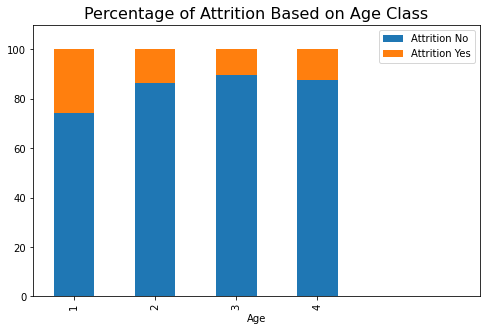

In [22]:
df_plot_Age.plot(kind='bar',stacked=True, figsize=(8,5))
plt.title('Percentage of Attrition Based on Age Class', fontsize = 16)
plt.legend(loc = 'upper right')
plt.xlim(-0.5,5)
plt.ylim(0, 110);

* Kelompok umur 1 (rentang usia diantara 18 - 30 tahun) mempunyai tingkat atrisi paling tinggi dibandingkan kelas umur lainnya

**Visualisasi tingkat atrisi karyawan berdasarkan departement**

In [23]:
dfs = dataframe.groupby(['Attrition', 'Department']).size().reset_index()
df_plot_Dept = dataframe.groupby(['Attrition', 'Department']).size().reset_index().pivot(columns = 'Attrition', index = 'Department', values = 0)
df_plot_Dept

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [24]:
df_plot_Dept['Total Employee'] = df_plot_Dept['No'] + df_plot_Dept['Yes']
df_plot_Dept['Attrition No'] = df_plot_Dept['No']/df_plot_Dept['Total Employee']*100.00
df_plot_Dept['Attrition Yes'] = df_plot_Dept['Yes']/df_plot_Dept['Total Employee']*100.00
df_plot_Dept = df_plot_Dept.drop(['No','Yes','Total Employee'], axis=1)
df_plot_Dept

Attrition,Attrition No,Attrition Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


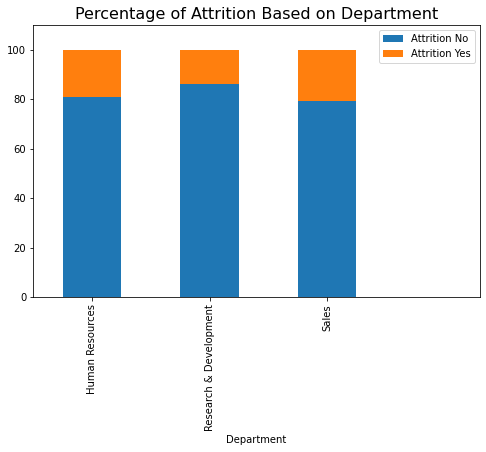

In [25]:
df_plot_Dept.plot(kind='bar',stacked=True, figsize=(8,5))
plt.title('Percentage of Attrition Based on Department', fontsize = 16)
plt.legend(loc = 'upper right')
plt.xlim(-0.5,3.3)
plt.ylim(0, 110);

* Department sales memiliki tingkat atrisi lebih tinggi dibandingkan Human Resource dan Research & Development

**Visualisasi tingkat atrisi karyawan berdasarkan role pekerjaan**

In [26]:
dfs = dataframe.groupby(['Attrition', 'JobRole']).size().reset_index()
df_plot_Job = df.groupby(['Attrition', 'JobRole']).size().reset_index().pivot(columns = 'Attrition', index = 'JobRole', values = 0)
df_plot_Job

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


In [27]:
df_plot_Job['Total Employee'] = df_plot_Job['No'] + df_plot_Job['Yes']
df_plot_Job['Attrition No'] = df_plot_Job['No']/df_plot_Job['Total Employee']*100.00
df_plot_Job['Attrition Yes'] = df_plot_Job['Yes']/df_plot_Job['Total Employee']*100.00
df_plot_Job = df_plot_Job.drop(['No','Yes','Total Employee'], axis=1)
df_plot_Job

Attrition,Attrition No,Attrition Yes
JobRole,,
Healthcare Representative,93.129771,6.870229
Human Resources,76.923077,23.076923
Laboratory Technician,76.061776,23.938224
Manager,95.098039,4.901961
Manufacturing Director,93.103448,6.896552
Research Director,97.500000,2.500000
Research Scientist,83.904110,16.095890
Sales Executive,82.515337,17.484663
Sales Representative,60.240964,39.759036


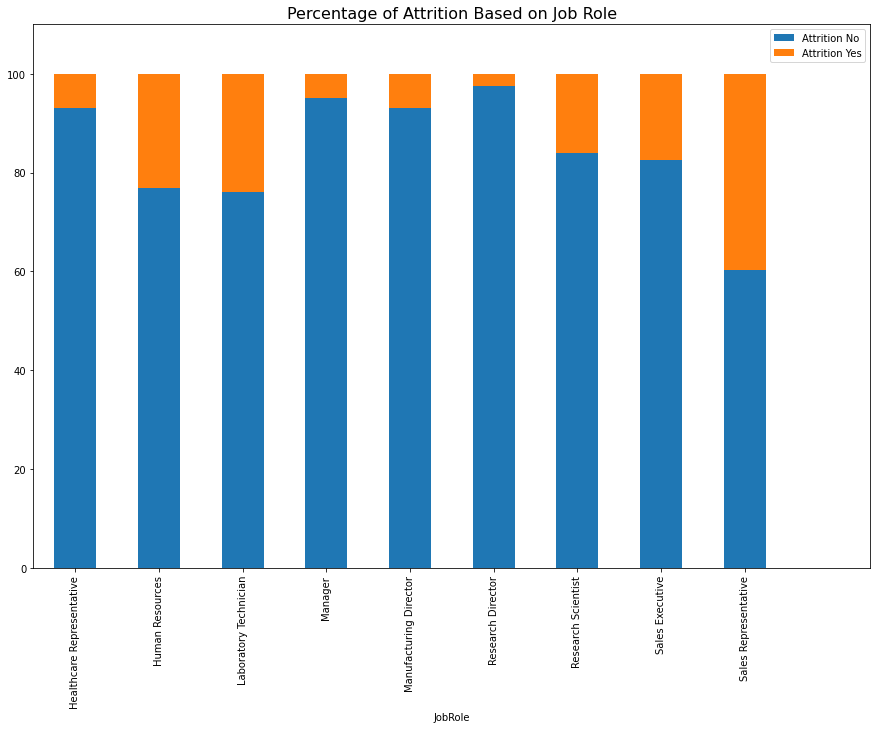

In [28]:
df_plot_Job.plot(kind='bar',stacked=True, figsize=(15,10))
plt.title('Percentage of Attrition Based on Job Role', fontsize = 16)
plt.legend(loc = 'upper right')
plt.xlim(-0.5,9.5)
plt.ylim(0, 110);

* Role pekerjaan Sales representative mempunyai tingkat atrisi tertinggi dibandingkan role pekerjaan yang lainnya

## 3. Prepare Data

### a. Data cleaning 

#### I. Missing values

In [29]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Tidak ada baris yang hilang atau bernilai null

#### II. Duplicated Data

In [30]:
df.duplicated().sum()

0

Tidak ada baris atau kolom yang mempunyai duplikat. Dataset ini sudah cukup bersih

#### III. Outliers

**Cek nilai outlier**

In [31]:
def qr_outliers(col):
    outliers = []
    
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    inter_qr = q3 - q1
    lower_limit = q1 - 1.5 * inter_qr
    upper_limit = q3 + 1.5 * inter_qr
    for val in col:
        if val > upper_limit or val < lower_limit:
            outliers.append(val)
    return outliers

In [32]:
col_outliers = []
for col in df.columns:
    if df[col].dtype == 'O' : continue
    else : 
        outliers = qr_outliers(df[col])
        if outliers != []:
            col_outliers.append(col)
            print(col,':' ,outliers)

MonthlyIncome : [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
NumCompaniesWorked : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Perform

**Cek unik value pada beberapa kolom tertentu**

In [33]:
print('NumCompaniesWorked:', df.NumCompaniesWorked.unique())
print('PerformanceRating:', df.PerformanceRating.unique())
print('StockOptionLevel:', df.StockOptionLevel.unique())

NumCompaniesWorked: [8 1 6 9 0 4 5 2 7 3]
PerformanceRating: [3 4]
StockOptionLevel: [0 1 3 2]


**Handle Outlier**

Karena kami memiliki solusi berbeda untuk menangani kolom konstan versus kolom dengan outlier, kami memisahkan keduanya. jadi kami menyimpan kolom konstan di constant_cols dan menyimpan kolom outlier di col_outliers.

In [34]:
constant_cols = col_outliers[1:4]
col_outliers[1:4] = []
col_outliers

['MonthlyIncome',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [35]:
def box_plot_outliers(cols, df):
    fig, ax = plt.subplots(7,2, figsize = (8, 15))
    
    i = 0
    j = 0
    for col in cols:
        #print(col)
        sns.boxplot(df[col], ax = ax[i, j])

        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel(col)
        j += 1

        df.loc[df[col] > 0, col], fitted_lambda = stats.boxcox(df[df[col] > 0][col], lmbda = None)
        sns.boxplot(df[col], ax = ax[i, j], color = '#FEE23E')
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        i += 1
        j -= 1
        
    fig.suptitle('Before [left] and After [Right] BoxCox Transformation for Removing Outliers ', fontsize = 12)
    fig.subplots_adjust(top = 0.98)
    fig.tight_layout()
    
    plt.show()

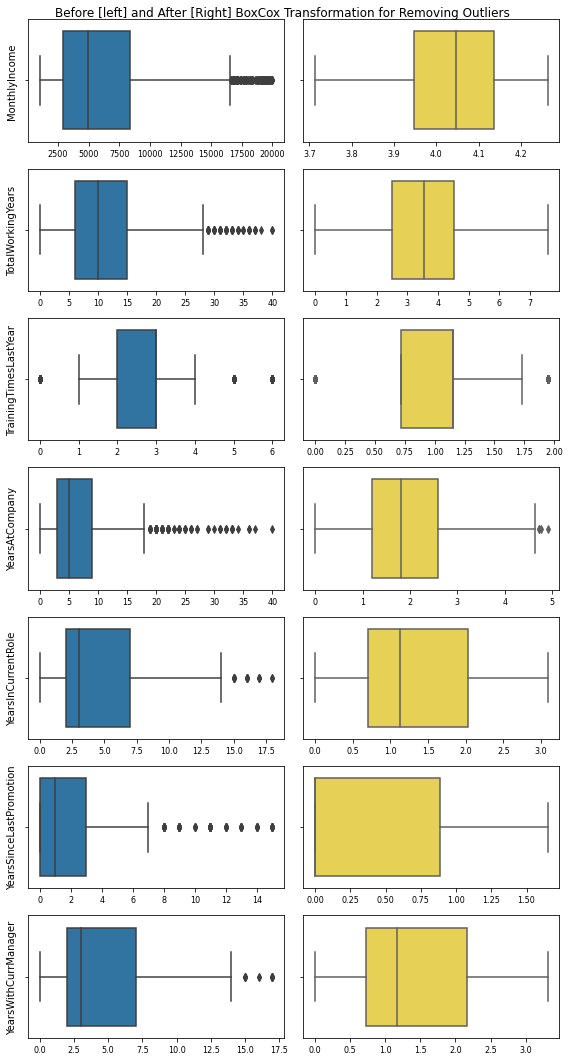

In [36]:
box_plot_outliers(col_outliers, df)

Boxplot biru merupakan kolom dengan outlier yang belum dibersihkan, sedangkan boxplot kuning merupakan kolom dengan outlier yang sudah dibersihkan. Dapat terlihat bahwa setelah outlier dibersihkan, distribusinya menjadi lebih baik.

In [37]:
def constant_cols_outliers(cols, df):
    fig, ax = plt.subplots(3,2, figsize = (8, 5))
    
    i = 0
    j = 0
    for col in cols:
        #print(col)
        
        sns.distplot(df[col], ax = ax[i, j])
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel(col)
        j += 1
        
        if col == 'NumCompaniesWorked':
            df.loc[df[col] == 9, col] = np.mean(df[col])
        elif col == 'PerformanceRating':
            df.loc[df[col] == 4, col] = np.mean(df[col])
        else:
            df.loc[df[col] == 3, col] = np.mean(df[col])
        
        sns.distplot(df[col], ax = ax[i, j], color = 'y')
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        i += 1
        j -= 1
        
    fig.suptitle('Before [left] and After [Right] mean imputation for Removing Constant value Outliers ', fontsize = 12)
    fig.subplots_adjust(top = 0.98)
    fig.tight_layout()
    
    plt.show()

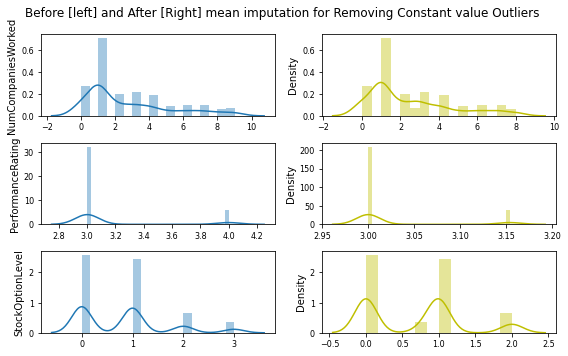

In [38]:
constant_cols_outliers(constant_cols, df)

#### IV. Preprocessing and Encoding Categorical Columns

Kami menggunakan label encoder untuk mengubah data kategorikal menjadi numerikal

In [39]:
labelenc = LabelEncoder()
df['Attrition'] = labelenc.fit_transform(df['Attrition'])
df['Department'] = labelenc.fit_transform(df['Department'])
df['EducationField'] = labelenc.fit_transform(df['EducationField'])
df['Gender'] = labelenc.fit_transform(df['Gender'])
df['JobRole'] = labelenc.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelenc.fit_transform(df['MaritalStatus'])
df['BusinessTravel'] = labelenc.fit_transform(df['BusinessTravel'])
df['OverTime'] = labelenc.fit_transform(df['OverTime'])

#### V. Removing constant columns

In [40]:
print(df.Over18.unique())
print(df.EmployeeCount.unique())
print(df.StandardHours.unique())

['Y']
[1]
[80]


In [41]:
df.EmployeeNumber.unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

Menghapus kolom yang hanya memiliki satu nilai unik, dan menghapus employee number karena tidak digunakan dalam pemodelan

In [42]:
df.drop('Over18', axis = 1, inplace = True)
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('EmployeeNumber', axis = 1, inplace = True)

### b. Feature Correlations

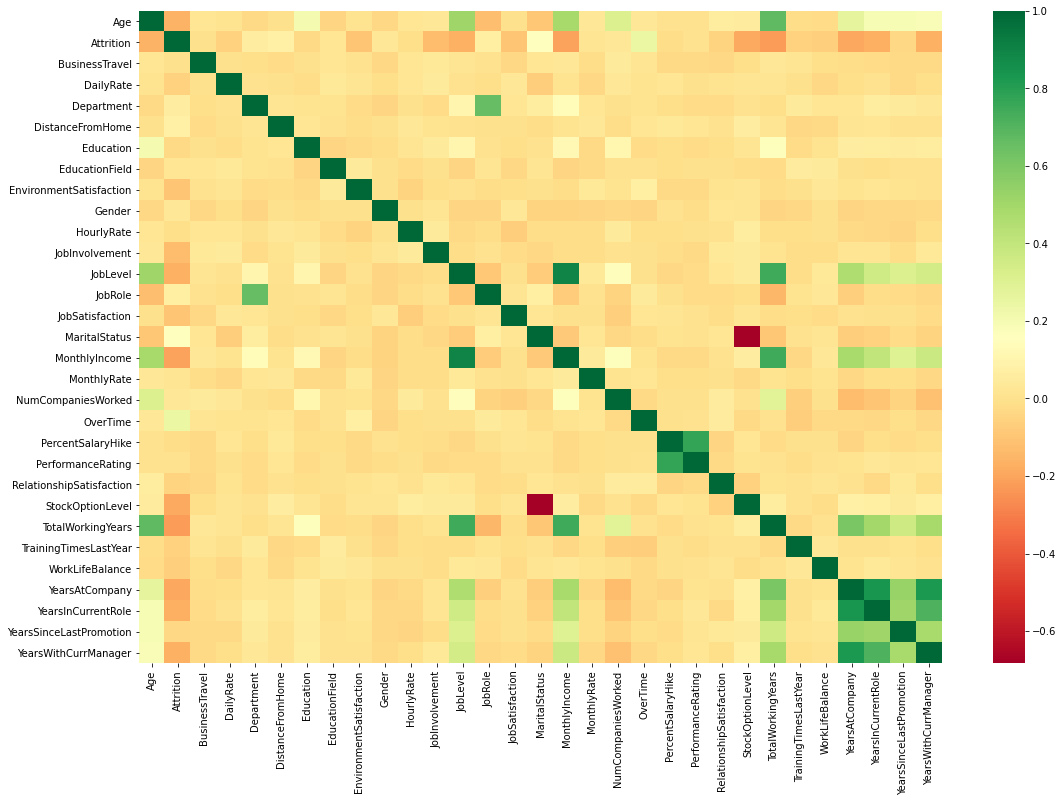

In [43]:
fig, ax = plt.subplots(1,1, figsize = (18,12))
sns.heatmap(df.corr(), cmap = 'RdYlGn')
plt.show()

In [44]:
extract_corr = df.corr()
extract_corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.030383
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033592
RelationshipSatisfaction   -0.045872
TrainingTimesLastYear      -0.051867
DailyRate                  -0.056652
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
Age                        -0.159205
YearsWithCurrManager       -0.163686
JobLevel                   -0.169105
YearsInCurrentRole         -0.176056
S

Dari matriks korelasi diatas, kami highlite beberapa penemuan penting, yaitu:
- Attrition berkorelasi negatif dengan Monthly Income, total tahun kerja, StockOpsLevel, tahun di perusahaan, tahun dalam peran saat ini, tahun dengan manajer saat ini, kepuasan kerja, keterlibatan kerja, kepuasan lingkungan dan usia.
- Ada korelasi yang tinggi antara Persen kenaikan gaji dan peringkat kinerja serta Tingkat pekerjaan dan pendapatan bulanan.
- Tahun di perusahaan, tahun dalam peran saat ini, tahun sejak promosi terakhir, tahun dengan manajer saat ini, total tahun kerja, pendapatan bulanan dan tingkat pekerjaan juga berkorelasi.


## 4. Defining Classifiers

In [45]:
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
}

Pemilihan feature dan target untuk model

In [46]:
x = df.drop('Attrition', axis = 1)
y = df['Attrition']

## 5. Evaluation metrics
### a. Classification Reports (mean values for k-folds)

In [47]:
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle=True)
scaler = StandardScaler()
d1 = []

#indeces and columns for classification report
ind = ['precision', 'recall', 'f1-score', 'support']
cols = ['0', '1', 'accuracy','macro avg', 'weighted avg']

for name, clf in classifiers.items(): 
    #del d1,d2
    d1 = [] # a list to collect the classification report of imbalanced data
    d2 = [] # a list to collect the classification report of oversampled data
    for train_ind, valid_ind in skf.split(x, y):
        
        x.iloc[train_ind] = scaler.fit_transform(x.iloc[train_ind])
        x.iloc[valid_ind] = scaler.transform(x.iloc[valid_ind])
        
        clf.fit(x.iloc[train_ind], y.iloc[train_ind])
        y_train_pred = clf.predict(x.iloc[train_ind])
        y_valid_pred = clf.predict(x.iloc[valid_ind])
        
        #resamples only minority class
        x_oversampled, y_oversampled = SMOTE(
            sampling_strategy = 'minority', random_state = 42).fit_resample(x.iloc[train_ind], y.iloc[train_ind])
        clf.fit(x_oversampled, y_oversampled)
        y_valid_pred_oversampled = clf.predict(x.iloc[valid_ind])
        
        d3 = classification_report(y.iloc[valid_ind], y_valid_pred, output_dict = True)
        d4 = classification_report(y.iloc[valid_ind], y_valid_pred_oversampled, output_dict = True)
        
        d1.append(d3)
        d2.append(d4)
    
    temp_df_1 = pd.DataFrame(d1, columns = cols) #Dataframe containing the classification report for all 5-folds for imbalanced data
    temp_df_2 = pd.DataFrame(d2, columns = cols) #Dataframe containing the classification report for all 5-folds for oversampled data
    
    #del report_1, report_2
    report_1 = pd.DataFrame(index = ind, columns = cols) #classification report for imbalanced data
    report_2 = pd.DataFrame(index = ind, columns = cols) #classification report for oversampled data

    for index in ind:
        for col in temp_df_1:
            #del g1, g2
            g1 = [] #containing the values for each index(accuracy, precision, etc) in 5-folds for a speicific col in imbalanced data
            g2 = [] #containing the values for each index(accuracy, precision, etc) in 5-folds for a speicific col in oversampled data
            
            if col == 'accuracy':
                report_1.loc[index,col] = np.mean(temp_df_1[col])
                report_2.loc[index,col] = np.mean(temp_df_2[col])
                continue

            g1.append(temp_df_1[col].apply(lambda x: x[index])) #exctracting the data for each index (accuracy, precison, etc)
            g2.append(temp_df_2[col].apply(lambda x: x[index]))
            
            report_1.loc[index,col] = np.mean(g1) #Taking the mean for 5-folds
            report_2.loc[index,col] = np.mean(g2)
        
    print('classification report for', name, 'with imbalanced data:' )
    print(report_1)
    print('')
    print('classification report for', name, 'with oversampled data:' )
    print(report_2)
    print('')
    print('===============================================================')

classification report for Logistic Regression with imbalanced data:
                  0         1  accuracy macro avg weighted avg
precision  0.891679  0.749612  0.879592  0.820646     0.868708
recall     0.974846  0.383954  0.879592    0.6794     0.879592
f1-score   0.931404  0.507314  0.879592  0.719359     0.863022
support       246.6      47.4  0.879592     294.0        294.0

classification report for Logistic Regression with oversampled data:
                  0         1  accuracy macro avg weighted avg
precision   0.93591  0.377686  0.762585  0.656798     0.845925
recall     0.769678  0.725798  0.762585  0.747738     0.762585
f1-score   0.844627  0.496616  0.762585  0.670621     0.788523
support       246.6      47.4  0.762585     294.0        294.0

classification report for K Neighbors Classifier with imbalanced data:
                  0         1  accuracy macro avg weighted avg
precision  0.851614  0.558687  0.841497   0.70515     0.804386
recall     0.982153  0.109574  0.8

Logistik regresi memberikan skor f1 terbaik untuk kelas attrition = Yes dengan 0,496. Regresi logistik mengikutinya sebagai pengklasifikasi terbaik kedua dengan 0,495.
Kami akan melanjutkan analisis dengan mempertimbangkan iterasi terakhir dari split dataset sebagai split untuk training set dan test set.

### b. Area Under Curve

In [48]:
x_train = x_oversampled
y_train = y_oversampled
x_test = x.iloc[valid_ind]
y_test = y.iloc[valid_ind]

In [49]:
train_class_report = {}
test_class_report = {}
AP_score = {}
auc_score = {}

#fig, ax = plt.subplots(4,2, figsize = (10,12)) #Runs with no problem in sklearn 1.0 and onwards
i = 0
    
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    train_class_report[name] = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
    test_class_report[name] = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
    if (name != 'K Neighbors Classifier' and name != 'Decision Tree Classifier'):
        print(name)
        y_pred_decision = clf.decision_function(x_test)
        AP_score[name] = np.round(average_precision_score(y_test, y_pred_decision),3)
    auc_score[name] = np.round(roc_auc_score(y_test, y_test_pred),3)
    #PrecisionRecallDisplay.from_estimator(clf, x_test, y_test, ax = ax[i//2, (i)%2]) #Runs with no problem in sklearn 1.0 and onwards

    i += 1

Logistic Regression


In [50]:
auc_score

{'Logistic Regression': 0.757,
 'K Neighbors Classifier': 0.645,
 'Decision Tree Classifier': 0.608}

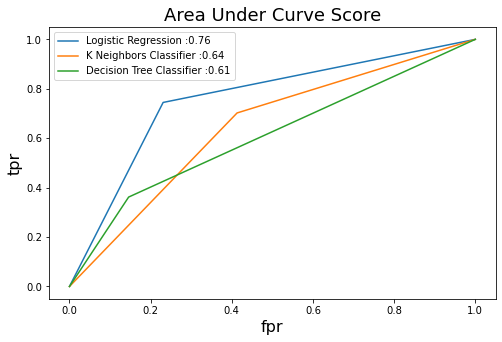

In [51]:
fig, ax = plt.subplots(figsize = (8,5))
for name, clf in classifiers.items():
    #y_predict = cross_val_predict(clf, x_test, y_test, method = 'predict')
    y_predict = clf.predict(x_test)
    fpr, tpr, threshold = roc_curve(y_test, y_predict)
    auc_score = roc_auc_score(y_test, y_predict)
    ax.plot(fpr, tpr, label = (name +' :%.2f' %(auc_score)))
    ax.legend()
    ax.set_xlabel('fpr', fontsize = 16)
    ax.set_ylabel('tpr', fontsize = 16)
    ax.set_title('Area Under Curve Score', fontsize = 18)
plt.show()

Model yang memiliki skor AUC paling baik adalah logistik regresi, dengan nilai 0,76.

## 6. Hyperparameter Tuning and Model Improvement

Kami melakukan tuning hyperparameter untuk model yang telah kami uji

In [52]:
hyperparameters = {
    'Logistic Regression':{
                            'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1] 
                            }, #l1 referst to lasso regression and l2 to Ridge regression, C is the inverse of (lambda, strength of regularization)
    'K Neighbors Classifier':{
                            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_neighbors': list(range(3,8,1))
                              },#‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
    'Decision Tree Classifier':{
                                'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,5,1))
                                #Criterion is the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain
                                }
}

In [53]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 32)
clfs = []

for clf, hyperparam in hyperparameters.items():
    estimator = classifiers.get(clf)
    grid = GridSearchCV(estimator, hyperparam, cv = cv)
    grid.fit(x_train, y_train)
    best_hyperparams = grid.best_params_
    clfs.append(grid.best_estimator_)
    print('The best hyperparameters for', clf, ':', best_hyperparams, 'with r2 score: %0.1f' %(grid.best_score_))

The best hyperparameters for Logistic Regression : {'C': 0.01, 'penalty': 'l2'} with r2 score: 0.8
The best hyperparameters for K Neighbors Classifier : {'algorithm': 'auto', 'n_neighbors': 4} with r2 score: 0.9
The best hyperparameters for Decision Tree Classifier : {'criterion': 'gini', 'max_depth': 4} with r2 score: 0.8


Perubahan dengan tuning hyperparameter dalam kasus kami adalah tidak terlalu signifikan. Ini mungkin karena dataset kami yang kecil.
Regresi logistik merupakan model pengklasifikasi terbaik diantara model lainnya yang kami uji. GridSearch menunjukan bahwa C = 1 dan penalti = l2 memberikan hasil terbaik untuk pengklasifikasi ini. Namun keduanya merupakan nilai default untuk model Regresi Logistik. Jadi performa terbaik yang kami dapatkan dari model klasifikasi kami adalah auc = 76 dan F1-score = 0,84 untuk atrisi yes dan 0,49 untuk atrisi no.

## 7. Feature importance

In [54]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
y_train_pred = lr_clf.predict(x_train)
y_test_pred = lr_clf.predict(x_test)

In [55]:
feature_names = x.columns
feature_names

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [56]:
w = np.zeros((30,))
w = lr_clf.coef_[0]

In [57]:
w

array([-8.93313424e-02,  2.97642864e-02, -2.55772354e-01,  4.40892648e-01,
        3.54980931e-01, -4.51772091e-04,  2.13593863e-01, -6.74746586e-01,
        2.15849165e-01, -1.61759911e-02, -3.52163232e-01,  5.88583828e-01,
       -2.27880189e-01, -4.57535957e-01,  2.40194948e-01, -1.07649035e+00,
        1.23613626e-02,  4.17738058e-01,  9.19928006e-01, -2.93105359e-01,
        2.55210958e-02, -1.60153447e-01, -5.25717277e-01, -4.80997050e-01,
       -1.42097978e-01, -2.60356203e-01, -4.07311676e-02, -1.91069441e-01,
        5.94462965e-01, -2.60760812e-01])

In [58]:
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending = False)
feature_importance[:7]

,feature,importance
18,OverTime,2.509110
28,YearsSinceLastPromotion,1.812058
11,JobLevel,1.801435
3,Department,1.554094
17,NumCompaniesWorked,1.518523
4,DistanceFromHome,1.426153
14,MaritalStatus,1.271497


<AxesSubplot:xlabel='importance', ylabel='feature'>

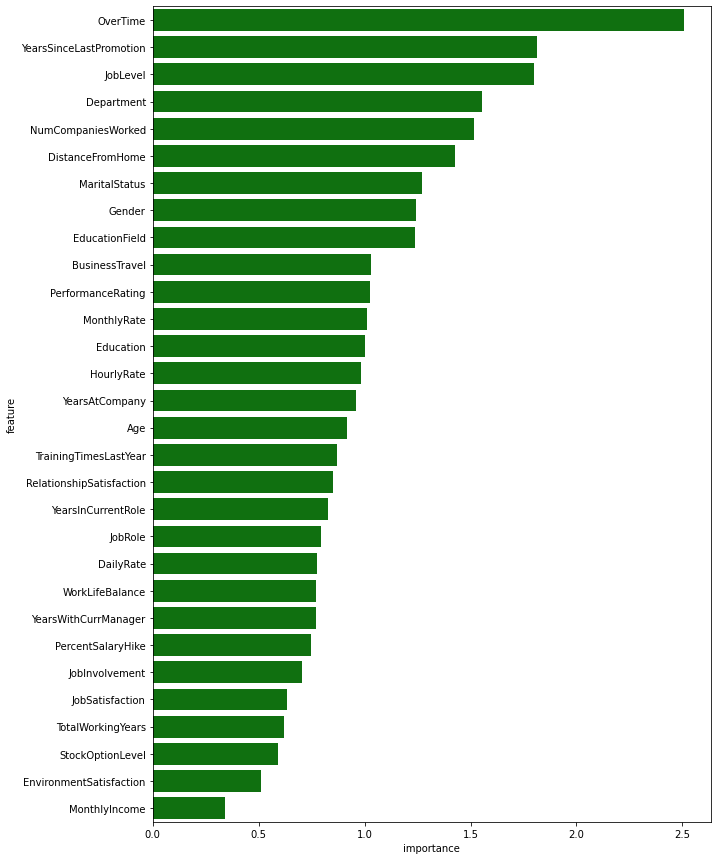

In [59]:
fig, ax = plt.subplots(1,1, figsize=(10,15))
sns.barplot(x='importance', y='feature', color='green',data=feature_importance.reset_index())

Dari plot feature important diatas, kita dapat melihat faktor mana yang paling mempengaruhi dan paling sedikit mempengaruhi atrisi. Overtime ternyata memiliki dampak yang besar dalam mempengaruhi atrisi, dan monthly income mungkin merupakan faktor yang paling tidak penting, atau dengan kata lain, mempunyai pengaruh paling sedikit terhadap atrisi.

## 8. Summary

Dalam project ini kami mencoba mencari tahu faktor apa saja yang berkontribusi terhadap atrisi karyawan.  <br>
Regresi Logistik merupakan model terbaik dengan F1-score = 0,84 untuk atrisi yes dan 0,49 untuk atrisi no. <br>
Dari model tersebut juga didapatkan insight bahwa faktor paling berpengaruh terhadap atrisi adalah overtime dan diikuti oleh years since last promotion.